# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from pmdarima import auto_arima

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
total_data = pd.read_csv(url)
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
total_data['date'] = pd.to_datetime(total_data['date'])

In [4]:
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
total_data['year'] = total_data['date'].dt.year  # Año
total_data['month'] = total_data['date'].dt.month  # Mes
total_data['day'] = total_data['date'].dt.day  # Día

# Mostrar las primeras filas para verificar
print(total_data.head())

                        date      sales  year  month  day
0 2022-09-03 17:10:08.079328  55.292157  2022      9    3
1 2022-09-04 17:10:08.079328  53.803211  2022      9    4
2 2022-09-05 17:10:08.079328  58.141693  2022      9    5
3 2022-09-06 17:10:08.079328  64.530899  2022      9    6
4 2022-09-07 17:10:08.079328  66.013633  2022      9    7


In [6]:
#pd.set_option('display.max_rows', None) #Mostrar todas las filas

total_data.diff()

,date,sales,year,month,day
0,NaT,NaN,NaN,NaN,NaN
1,1 days,-1.488946,0.0,0.0,1.0
2,1 days,4.338482,0.0,0.0,1.0
3,1 days,6.389205,0.0,0.0,1.0
4,1 days,1.482734,0.0,0.0,1.0
...,...,...,...,...,...
361,1 days,0.518681,0.0,0.0,1.0
362,1 days,5.386972,0.0,0.0,1.0
363,1 days,0.827090,0.0,1.0,-30.0
364,1 days,1.535798,0.0,0.0,1.0


In [7]:

total_data['date'] = total_data['date'].dt.date  # Extraer solo la fecha (AAAA-MM-DD) de la columna 'date'
total_data = total_data.set_index('date') # Establecer la columna 'date' como índice

print(total_data.head())


                sales  year  month  day
date                                   
2022-09-03  55.292157  2022      9    3
2022-09-04  53.803211  2022      9    4
2022-09-05  58.141693  2022      9    5
2022-09-06  64.530899  2022      9    6
2022-09-07  66.013633  2022      9    7


#### - ¿Cuál es el tensor de la serie temporal?  
El tensor es la unidad mínima de tiempo para la que hay datos (día, semana, mes, etc.). En este caso hablaríamos de un día, excepto en la fila 363 en la cual hay un salto de 30 días. Un mes.

#### - ¿Cuál es la tendencia?

La tendencia es claramente creciente constante

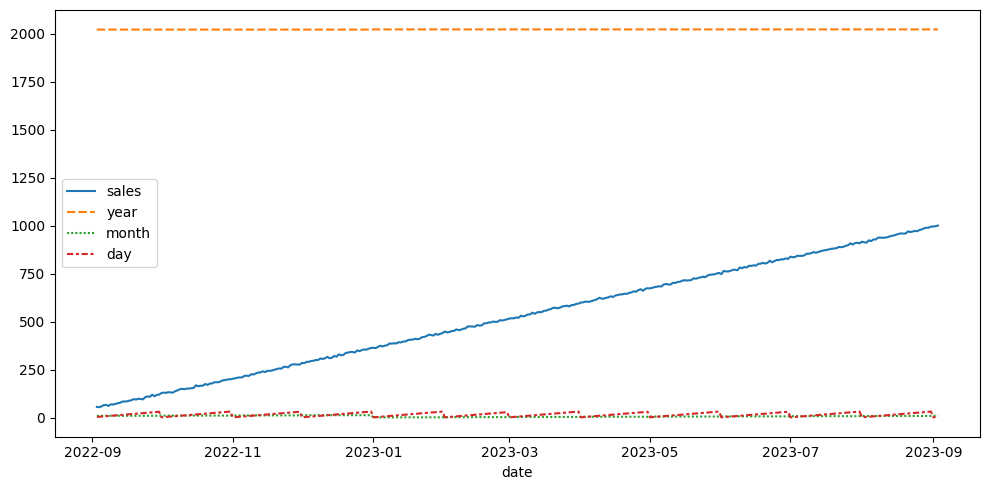

In [8]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)

plt.tight_layout()

plt.show()

#### - ¿Es estacionaria?

In [ ]:
#from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller aumentada (ADF)
adf_result = adfuller(total_data['sales'])

# Extraer los resultados clave
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# Mostrar resultados
{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Critical Values": critical_values
}


{'ADF Statistic': 0.545414193706378,
 'p-value': 0.9861899815311064,
 'Critical Values': {'1%': -3.4490648539347544,
  '5%': -2.8697861692116478,
  '10%': -2.5711631253228306}}

In [ ]:
# seasonal_decompose en 7  si el p vlue es alto buscar la diferencia - variación?? el mismo test de alreves? HACER EL MODELO Y PREDICCION CON TODO EL CONJUNTO DE DATOS - hacer una predicción con menos dias Diana pone 100 después de hacerlo con el completo - luego comparar visualmente con la realidad
# dividir en varios meses?
# ¿data subset :100]? qué es el diferencial ??? - cambiar a menos días . - no pasar menos de una cuarta parte - 

¿Variavilidad? 

No importante